# Week 5- Specialized Neural Networks: CNNs and RNNs

* What is convolution in general?
* What is a convolutional layer?
* If Feed-forward neural networks are genral, why do we even need CNNs?
* Build a NN for image classification using a FFNN and then a CNN
* Brief discussion of recurrant neural networks
    * Another example of a specialized network structure to handle a specific kind of data
    * Recently fallen out of favor after invention of transformers (discussed in 2nd half of semester)
 
#### Key Vocab:

* Neural Network Architecture
* Convolution
* Tensors
* Pooling Layer

In [63]:
# Imports used in this lesson

import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
from PIL import Image

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Input


## What is a Convolution?

> _Convolution_ can be thought of as a way to create new functions from old ones, alongside the familiar methods of addition, multiplitcaion, and composition of functions.
> 
From "Harmonic Analysis: From Fourier to Wavelets" Maria Cristina Pereyra & Lesley A. Ward

**Definition**

> For two functions $f$, $g$: $\mathbb{R} \to \mathbb{R}$, the _convolution_ of $f$ and $g$ (written $f * g$) is defined as
>
> $$(f * g)(t) = \int_{-\infty}^\infty f(\theta)\cdot g(t - \theta) d\theta$$
>

We can think of convolution as an operation where we slide one function along the domain of another.

## Discrete Convolution

We will be using a slightly different type of convolution operation, the _discrete convolution_.

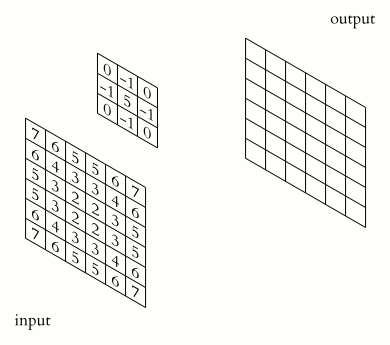
> Image From Wikipedia

The discrete convolution take the idea of the continuous convolution and applies it to vectors, matrices, or higher order tensors.
We can define (1-D) version similarly to the continuous convolution:

$$(A * B)[n] = \sum_{m = -\infty}^\infty A[m] \cdot B[n - m]$$

Where here we consider $A[n]$ to be equal to zero for $n$ outside $A$'s shape.


## Convolution and Image Processing

Convolution plays a vital role in the field of image processing, and thus any neural network dealing with image data.

**Definition**

> In the context of a convolution, particularly in Convolutional Neural Networks (CNNs), a **kernel** (also called a **filter**) is a small matrix of weights that is applied to an input (such as an image or feature map) to extract specific features. The kernel slides (or convolves) across the input, performing an element-wise multiplication with the values it overlaps, followed by summing up the results to produce a single output value. This process is repeated across the entire input, creating an output feature map.

### Key Characteristics of a Kernel
- **Size:** The kernel typically has a small, fixed size (e.g., ($3 \times 3$), ($5 \times 5$)), smaller than the input dimensions.
- **Weights:** The values inside the kernel matrix are learnable parameters optimized during the training process.
- **Feature Extraction:** Different kernels can detect different types of features, such as edges, textures, or patterns.

### Example of Applying Convolution for Image Processing

Let's apply a convolution to an image in order to detect edges in that image, using these kernels:

$$
\left[
\begin{array}{ccc}
-1 & -1 & -1 \\
-1 & 8 & -1 \\
-1 & -1 & -1
\end{array}
\right]
\,\,\,\,\,\,\,
\left[
\begin{array}{ccc}
1/9 & 1/9 & 1/9 \\
1/9 & 1/9 & 1/9 \\
1/9 & 1/9 & 1/9
\end{array}
\right]
$$

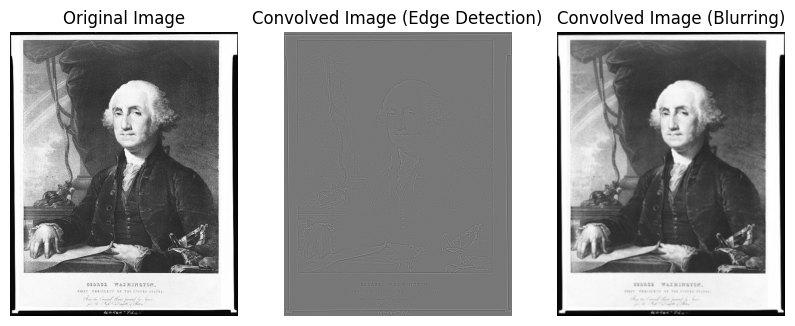

In [57]:
# Load an image as grayscale
image_path = "../images/Washington.jpg"  # Orignial image sourced from library of congress

image = Image.open(image_path).convert("L")  # Convert to grayscale
image_array = np.array(image)
image_array = image_array / 255

# Define kernels
kernel_edges = np.array([[-1, -1, -1],
                         [-1,  8, -1],
                         [-1, -1, -1]])

kernel_blur = 1.0 / 9.0 * np.ones((3, 3))

# Perform the convolution using scipy's convolve2d
convolved_image_edges = convolve2d(image_array, kernel_edges, mode='same', boundary='fill', fillvalue=0)
convolved_image_blur = convolve2d(image_array, kernel_blur, mode='same', boundary='fill', fillvalue=0)

# Plot the original and convolved images
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image_array, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Convolved Image (Edge Detection)")
plt.imshow(convolved_image_edges, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Convolved Image (Blurring)")
plt.imshow(convolved_image_blur, cmap='gray')
plt.axis('off')

plt.show()


## Convolutional Neural Networks

We have seen that convolution can be used to transform one images into another in a way that extracts certain information about that image or makes aspects of the image more apparent.
It can be fun or interesting to try to think up different kinds of kernels and what sorts of features that kernel would identify.
However, we can use the power of deep learning and gradient descent to _learn_ the weights of the kernel instead of specifying them directly.
This is the key idea of a _convolutional neural network_ or CNN.

Let's go through a basic example of a CNN using the famous MNIST dataset.

[Keras Convolutional Layer Documentation](https://keras.io/api/layers/convolution_layers/convolution2d/)

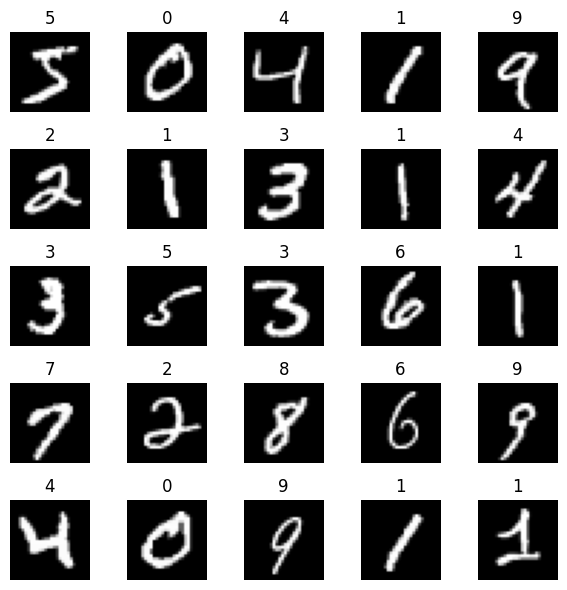

In [102]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Display a few images from the dataset

plt.figure(figsize=(6, 6))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title('y_train[i])
    plt.axis('off')
plt.tight_layout()

In [111]:
# Create the model

model = Sequential()

model.add(Input((28, 28, 1)))
model.add(Conv2D(10, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 26, 26, 10)     │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │        67,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,710 (264.49 KB)

 Trainable params: 67,710 (264.49 KB)

 Non-trainable params: 0 (0.00 B)

In [112]:
# Train the model

print("Training...")

model.fit(x_train, y_train)

Training...
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 3.6155


Prediction...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Accuracy: 0.9587


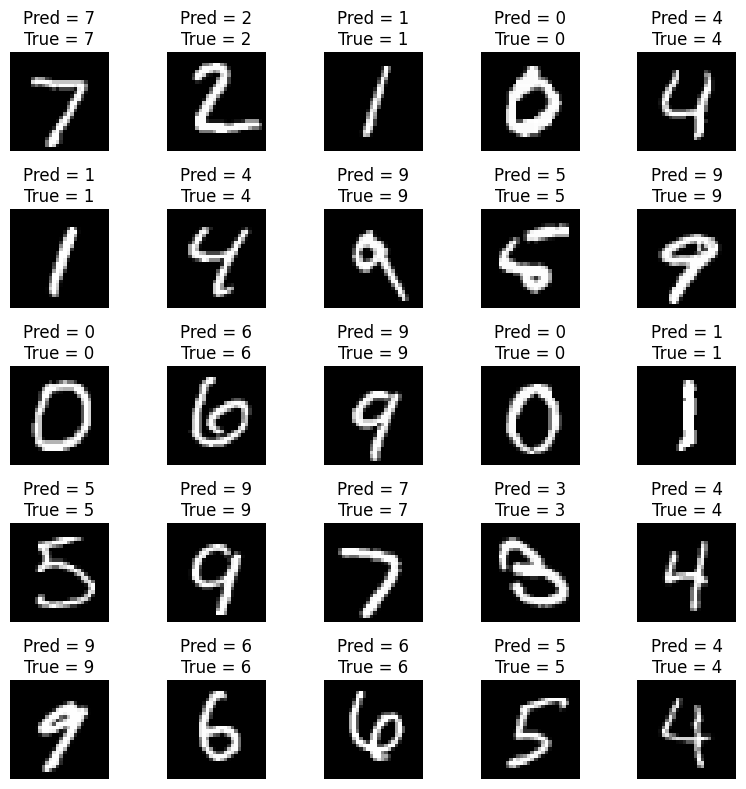

In [113]:
# Make test predictions:

print("Prediction...")

y_hat_test = model.predict(x_test)
y_hat_test_prediction = np.argmax(y_hat_test, axis=1)

acc = (y_hat_test_prediction == y_test).mean()

print("Test Accuracy:" , acc)

plt.figure(figsize=(8, 8))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Pred = {y_hat_test_prediction[i]}\nTrue = {y_test[i]}")
    plt.axis('off')
plt.tight_layout()

# Homework Questions

1. What is convolution? Why would it make sense for a neural network to share weights? Why are convolutional layers good choices for neural networks woking with image data?
2. What is a tensor? 
3. Load the fashion MNIST dataset. Train a CNN neural network to predict the class of images.
4. Load the stock dataset. Create a recurrent neural network to predict the next day's closing stock price.